In [1]:
pip install us

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import pearsonr
from scipy.stats import ks_2samp
import us

## Data Cleaning

### Food Access Dataset

In [5]:
# Import food desert dataset
df_food = pd.read_excel('FoodAccessResearchAtlasData2019.xlsx', sheet_name = 'Food Access Research Atlas')
df_food

,CensusTract,State,County,Urban,Pop2010,OHU2010,GroupQuartersFlag,NUMGQTRS,PCTGQTRS,LILATracts_1And10,...,TractSeniors,TractWhite,TractBlack,TractAsian,TractNHOPI,TractAIAN,TractOMultir,TractHispanic,TractHUNV,TractSNAP
0,1001020100,Alabama,Autauga County,1,1912,693,0,0.0,0.000000,0,...,221.0,1622.0,217.0,14.0,0.0,14.0,45.0,44.0,6.0,102.0
1,1001020200,Alabama,Autauga County,1,2170,743,0,181.0,8.341014,1,...,214.0,888.0,1217.0,5.0,0.0,5.0,55.0,75.0,89.0,156.0
2,1001020300,Alabama,Autauga County,1,3373,1256,0,0.0,0.000000,0,...,439.0,2576.0,647.0,17.0,5.0,11.0,117.0,87.0,99.0,172.0
3,1001020400,Alabama,Autauga County,1,4386,1722,0,0.0,0.000000,0,...,904.0,4086.0,193.0,18.0,4.0,11.0,74.0,85.0,21.0,98.0
4,1001020500,Alabama,Autauga County,1,10766,4082,0,181.0,1.681219,0,...,1126.0,8666.0,1437.0,296.0,9.0,48.0,310.0,355.0,230.0,339.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72526,56043000200,Wyoming,Washakie County,0,3326,1317,0,57.0,1.713770,0,...,593.0,3106.0,6.0,15.0,0.0,27.0,172.0,309.0,61.0,64.0
72527,56043000301,Wyoming,Washakie County,1,2665,1154,0,10.0,0.375235,0,...,399.0,2377.0,5.0,23.0,0.0,40.0,220.0,446.0,88.0,41.0
72528,56043000302,Wyoming,Washakie County,1,2542,1021,0,73.0,2.871755,0,...,516.0,2312.0,11.0,10.0,1.0,26.0,182.0,407.0,23.0,64.0
72529,56045951100,Wyoming,Weston County,0,3314,1322,0,252.0,7.604104,0,...,499.0,3179.0,15.0,10.0,1.0,47.0,62.0,91.0,47.0,34.0


In [6]:
##df_nulls = df_food[df_food.isna().any(axis=1)]

##columns_with_nulls = df_nulls.columns[df_nulls.isna().any()].tolist()

In [7]:
##columns_with_nulls

In [8]:
##columns_to_impute = [col for col in df_food.columns if 'la' in col[:2] or "LA" in col[:2]]

##for col in columns_to_impute[8:]:
##    print(df_food[col].isna().sum())

In [9]:
# df_food['NUMGQTRS'] = df_food['NUMGQTRS'].fillna(-1)
# df_food['PCTGQTRS'] = df_food['PCTGQTRS'].fillna(-1)
# df_food['PovertyRate'] = df_food['PovertyRate'].fillna(-1)
# df_food['MedianFamilyIncome'] = df_food.groupby('County')['MedianFamilyIncome'].transform(lambda x: x.fillna(x.mean()))

In [10]:
df_food.columns = df_food.columns.str.strip()

In [11]:
# The dataset is split up by tract, so we aim to combine all tracts of a county. Some variables are already defined as "shares" or percentages
# so we can remove all columns with share in name since they were a tract percentage divided by the county total population.
df_food_new = df_food.loc[:, ~df_food.columns.str.contains("share", case=False)]
df_food_new

,CensusTract,State,County,Urban,Pop2010,OHU2010,GroupQuartersFlag,NUMGQTRS,PCTGQTRS,LILATracts_1And10,...,TractSeniors,TractWhite,TractBlack,TractAsian,TractNHOPI,TractAIAN,TractOMultir,TractHispanic,TractHUNV,TractSNAP
0,1001020100,Alabama,Autauga County,1,1912,693,0,0.0,0.000000,0,...,221.0,1622.0,217.0,14.0,0.0,14.0,45.0,44.0,6.0,102.0
1,1001020200,Alabama,Autauga County,1,2170,743,0,181.0,8.341014,1,...,214.0,888.0,1217.0,5.0,0.0,5.0,55.0,75.0,89.0,156.0
2,1001020300,Alabama,Autauga County,1,3373,1256,0,0.0,0.000000,0,...,439.0,2576.0,647.0,17.0,5.0,11.0,117.0,87.0,99.0,172.0
3,1001020400,Alabama,Autauga County,1,4386,1722,0,0.0,0.000000,0,...,904.0,4086.0,193.0,18.0,4.0,11.0,74.0,85.0,21.0,98.0
4,1001020500,Alabama,Autauga County,1,10766,4082,0,181.0,1.681219,0,...,1126.0,8666.0,1437.0,296.0,9.0,48.0,310.0,355.0,230.0,339.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72526,56043000200,Wyoming,Washakie County,0,3326,1317,0,57.0,1.713770,0,...,593.0,3106.0,6.0,15.0,0.0,27.0,172.0,309.0,61.0,64.0
72527,56043000301,Wyoming,Washakie County,1,2665,1154,0,10.0,0.375235,0,...,399.0,2377.0,5.0,23.0,0.0,40.0,220.0,446.0,88.0,41.0
72528,56043000302,Wyoming,Washakie County,1,2542,1021,0,73.0,2.871755,0,...,516.0,2312.0,11.0,10.0,1.0,26.0,182.0,407.0,23.0,64.0
72529,56045951100,Wyoming,Weston County,0,3314,1322,0,252.0,7.604104,0,...,499.0,3179.0,15.0,10.0,1.0,47.0,62.0,91.0,47.0,34.0


In [12]:
# We can define the variables of a tract that we do want to combine when grouping by county
combined_variables = df_food_new.select_dtypes(include=['number']).drop(columns=['CensusTract', 'GroupQuartersFlag', 'HUNVFlag'], errors='ignore').columns.to_list()
combined_variables

['Urban',
 'Pop2010',
 'OHU2010',
 'NUMGQTRS',
 'PCTGQTRS',
 'LILATracts_1And10',
 'LILATracts_halfAnd10',
 'LILATracts_1And20',
 'LILATracts_Vehicle',
 'LowIncomeTracts',
 'PovertyRate',
 'MedianFamilyIncome',
 'LA1and10',
 'LAhalfand10',
 'LA1and20',
 'LATracts_half',
 'LATracts1',
 'LATracts10',
 'LATracts20',
 'LATractsVehicle_20',
 'LAPOP1_10',
 'LAPOP05_10',
 'LAPOP1_20',
 'LALOWI1_10',
 'LALOWI05_10',
 'LALOWI1_20',
 'lapophalf',
 'lalowihalf',
 'lakidshalf',
 'laseniorshalf',
 'lawhitehalf',
 'lablackhalf',
 'laasianhalf',
 'lanhopihalf',
 'laaianhalf',
 'laomultirhalf',
 'lahisphalf',
 'lahunvhalf',
 'lasnaphalf',
 'lapop1',
 'lalowi1',
 'lakids1',
 'laseniors1',
 'lawhite1',
 'lablack1',
 'laasian1',
 'lanhopi1',
 'laaian1',
 'laomultir1',
 'lahisp1',
 'lahunv1',
 'lasnap1',
 'lapop10',
 'lalowi10',
 'lakids10',
 'laseniors10',
 'lawhite10',
 'lablack10',
 'laasian10',
 'lanhopi10',
 'laaian10',
 'laomultir10',
 'lahisp10',
 'lahunv10',
 'lasnap10',
 'lapop20',
 'lalowi20',
 

In [13]:
# Here we group by State and County and take the sum for all variables except 'MedianFamilyIncome', where we took the average of the tracts
# of a given county.
df_food_new = df_food_new.groupby(['State', 'County']).agg(
    # total_population=('Pop2010', 'sum'),
    avg_median_family_income=('MedianFamilyIncome', 'mean'),
    **{f'total_{var}': (var, 'sum') for var in combined_variables}
).reset_index()

In [14]:
# Define variable list that we want to create new shares from using 'total_population'
total_combined_variables=[x for x in combined_variables if x != "MedianFamilyIncome"]
total_combined_variables=[f'total_{i}' for i in combined_variables]
total_combined_variables

['total_Urban',
 'total_Pop2010',
 'total_OHU2010',
 'total_NUMGQTRS',
 'total_PCTGQTRS',
 'total_LILATracts_1And10',
 'total_LILATracts_halfAnd10',
 'total_LILATracts_1And20',
 'total_LILATracts_Vehicle',
 'total_LowIncomeTracts',
 'total_PovertyRate',
 'total_MedianFamilyIncome',
 'total_LA1and10',
 'total_LAhalfand10',
 'total_LA1and20',
 'total_LATracts_half',
 'total_LATracts1',
 'total_LATracts10',
 'total_LATracts20',
 'total_LATractsVehicle_20',
 'total_LAPOP1_10',
 'total_LAPOP05_10',
 'total_LAPOP1_20',
 'total_LALOWI1_10',
 'total_LALOWI05_10',
 'total_LALOWI1_20',
 'total_lapophalf',
 'total_lalowihalf',
 'total_lakidshalf',
 'total_laseniorshalf',
 'total_lawhitehalf',
 'total_lablackhalf',
 'total_laasianhalf',
 'total_lanhopihalf',
 'total_laaianhalf',
 'total_laomultirhalf',
 'total_lahisphalf',
 'total_lahunvhalf',
 'total_lasnaphalf',
 'total_lapop1',
 'total_lalowi1',
 'total_lakids1',
 'total_laseniors1',
 'total_lawhite1',
 'total_lablack1',
 'total_laasian1',
 'to

In [15]:
for var in total_combined_variables:
    df_food_new[f"{var}_share"] = df_food_new[var] / df_food_new["total_Pop2010"]
df_food_new

,State,County,avg_median_family_income,total_Urban,total_Pop2010,total_OHU2010,total_NUMGQTRS,total_PCTGQTRS,total_LILATracts_1And10,total_LILATracts_halfAnd10,...,total_TractSeniors_share,total_TractWhite_share,total_TractBlack_share,total_TractAsian_share,total_TractNHOPI_share,total_TractAIAN_share,total_TractOMultir_share,total_TractHispanic_share,total_TractHUNV_share,total_TractSNAP_share
0,Alabama,Autauga County,69337.500000,7,54571,20221,455.0,12.853691,5,5,...,0.119954,0.785307,0.176706,0.008686,0.000586,0.004251,0.024464,0.024005,0.021825,0.049330
1,Alabama,Baldwin County,72665.741935,14,182265,73180,2307.0,41.062742,4,4,...,0.167712,0.856736,0.093847,0.007396,0.000488,0.006672,0.034861,0.043848,0.014841,0.032513
2,Alabama,Barbour County,44792.444444,2,27457,9820,3193.0,79.735470,4,5,...,0.142368,0.480023,0.468915,0.003897,0.001056,0.004152,0.041957,0.050515,0.030921,0.091634
3,Alabama,Bibb County,60645.500000,0,22915,7953,2224.0,26.251382,0,0,...,0.126816,0.758499,0.220249,0.000960,0.000567,0.002793,0.016932,0.017718,0.017892,0.037050
4,Alabama,Blount County,60437.666667,1,57322,21578,489.0,7.248861,0,0,...,0.147221,0.925788,0.013276,0.002041,0.000663,0.005356,0.052877,0.080702,0.014933,0.034297
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3137,Wyoming,Sweetwater County,85896.833333,6,43806,16475,679.0,20.529943,0,0,...,0.083162,0.884536,0.009999,0.007670,0.000959,0.009656,0.087180,0.152696,0.008857,0.020888
3138,Wyoming,Teton County,112766.750000,1,21294,8973,271.0,7.196154,0,0,...,0.098525,0.883864,0.002301,0.011036,0.000704,0.005213,0.096882,0.149854,0.010238,0.008923
3139,Wyoming,Uinta County,70347.666667,0,21118,7668,270.0,3.590040,0,0,...,0.088739,0.924046,0.002604,0.002889,0.001705,0.007955,0.060801,0.087840,0.014301,0.026186
3140,Wyoming,Washakie County,67003.666667,2,8533,3492,140.0,4.960759,0,0,...,0.176726,0.913512,0.002578,0.005625,0.000117,0.010899,0.067268,0.136177,0.020157,0.019805


In [16]:
#df_food_new[[f"{var}_share" for var in total_combined_variables]] = df_food_new[[f"{var}_share" for var in total_combined_variables]].apply(
#    lambda x: x / df_food_new["total_population"])

In [17]:
# Add state abbreviations in preparation for a merge with our other dataset
df_food_new = df_food_new.assign(State_Abbr=df_food_new['State'].map(lambda x: us.states.lookup(x).abbr if us.states.lookup(x) else None))
df_food_new = df_food_new.drop(columns=["State"])

In [18]:
df_food_new

,County,avg_median_family_income,total_Urban,total_Pop2010,total_OHU2010,total_NUMGQTRS,total_PCTGQTRS,total_LILATracts_1And10,total_LILATracts_halfAnd10,total_LILATracts_1And20,...,total_TractWhite_share,total_TractBlack_share,total_TractAsian_share,total_TractNHOPI_share,total_TractAIAN_share,total_TractOMultir_share,total_TractHispanic_share,total_TractHUNV_share,total_TractSNAP_share,State_Abbr
0,Autauga County,69337.500000,7,54571,20221,455.0,12.853691,5,5,3,...,0.785307,0.176706,0.008686,0.000586,0.004251,0.024464,0.024005,0.021825,0.049330,AL
1,Baldwin County,72665.741935,14,182265,73180,2307.0,41.062742,4,4,3,...,0.856736,0.093847,0.007396,0.000488,0.006672,0.034861,0.043848,0.014841,0.032513,AL
2,Barbour County,44792.444444,2,27457,9820,3193.0,79.735470,4,5,1,...,0.480023,0.468915,0.003897,0.001056,0.004152,0.041957,0.050515,0.030921,0.091634,AL
3,Bibb County,60645.500000,0,22915,7953,2224.0,26.251382,0,0,0,...,0.758499,0.220249,0.000960,0.000567,0.002793,0.016932,0.017718,0.017892,0.037050,AL
4,Blount County,60437.666667,1,57322,21578,489.0,7.248861,0,0,0,...,0.925788,0.013276,0.002041,0.000663,0.005356,0.052877,0.080702,0.014933,0.034297,AL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3137,Sweetwater County,85896.833333,6,43806,16475,679.0,20.529943,0,0,0,...,0.884536,0.009999,0.007670,0.000959,0.009656,0.087180,0.152696,0.008857,0.020888,WY
3138,Teton County,112766.750000,1,21294,8973,271.0,7.196154,0,0,0,...,0.883864,0.002301,0.011036,0.000704,0.005213,0.096882,0.149854,0.010238,0.008923,WY
3139,Uinta County,70347.666667,0,21118,7668,270.0,3.590040,0,0,0,...,0.924046,0.002604,0.002889,0.001705,0.007955,0.060801,0.087840,0.014301,0.026186,WY
3140,Washakie County,67003.666667,2,8533,3492,140.0,4.960759,0,0,0,...,0.913512,0.002578,0.005625,0.000117,0.010899,0.067268,0.136177,0.020157,0.019805,WY


### Death by County Dataset 

In [20]:
# Import mortality dataset
df_death = pd.read_excel('Underlying Cause of Death, 2018-2023, Single Race.xlsx')
df_death

,County,County Code,Deaths,Population,"Crude Rate per 100,000"
0,"Autauga County, AL",1001.0,35,55869,62.6
1,"Baldwin County, AL",1003.0,108,223234,48.4
2,"Barbour County, AL",1005.0,11,24686,Unreliable
3,"Blount County, AL",1009.0,18,57826,Unreliable
4,"Butler County, AL",1013.0,24,19448,123.4
...,...,...,...,...,...
1985,"Natrona County, WY",56025.0,39,79858,48.8
1986,"Park County, WY",56029.0,11,29194,Unreliable
1987,"Sheridan County, WY",56033.0,10,30485,Unreliable
1988,"Sweetwater County, WY",56037.0,21,42343,49.6


In [21]:
# Create separate County and State columns in preparation for the merge
df_death["County_State"]=df_death["County"]
df_death['State'] = df_death['County_State'].str.split(", ").str[1]
df_death['County'] = df_death['County_State'].str.split(", ").str[0]
df_death

,County,County Code,Deaths,Population,"Crude Rate per 100,000",County_State,State
0,Autauga County,1001.0,35,55869,62.6,"Autauga County, AL",AL
1,Baldwin County,1003.0,108,223234,48.4,"Baldwin County, AL",AL
2,Barbour County,1005.0,11,24686,Unreliable,"Barbour County, AL",AL
3,Blount County,1009.0,18,57826,Unreliable,"Blount County, AL",AL
4,Butler County,1013.0,24,19448,123.4,"Butler County, AL",AL
...,...,...,...,...,...,...,...
1985,Natrona County,56025.0,39,79858,48.8,"Natrona County, WY",WY
1986,Park County,56029.0,11,29194,Unreliable,"Park County, WY",WY
1987,Sheridan County,56033.0,10,30485,Unreliable,"Sheridan County, WY",WY
1988,Sweetwater County,56037.0,21,42343,49.6,"Sweetwater County, WY",WY


In [22]:
# Remove counties that have missing data.
df_death = df_death.dropna()
df_death

,County,County Code,Deaths,Population,"Crude Rate per 100,000",County_State,State
0,Autauga County,1001.0,35,55869,62.6,"Autauga County, AL",AL
1,Baldwin County,1003.0,108,223234,48.4,"Baldwin County, AL",AL
2,Barbour County,1005.0,11,24686,Unreliable,"Barbour County, AL",AL
3,Blount County,1009.0,18,57826,Unreliable,"Blount County, AL",AL
4,Butler County,1013.0,24,19448,123.4,"Butler County, AL",AL
...,...,...,...,...,...,...,...
1984,Laramie County,56021.0,51,99500,51.3,"Laramie County, WY",WY
1985,Natrona County,56025.0,39,79858,48.8,"Natrona County, WY",WY
1986,Park County,56029.0,11,29194,Unreliable,"Park County, WY",WY
1987,Sheridan County,56033.0,10,30485,Unreliable,"Sheridan County, WY",WY


In [23]:
# Query only relevant columns. We will recalculate the crude mortality rate per 100,000 using 'Deaths' from this dataset and the total 
# population from the other dataset once we perform the merge.
df_death=df_death.filter(items=["County_State", "State", "County", "Deaths"])
df_death

,County_State,State,County,Deaths
0,"Autauga County, AL",AL,Autauga County,35
1,"Baldwin County, AL",AL,Baldwin County,108
2,"Barbour County, AL",AL,Barbour County,11
3,"Blount County, AL",AL,Blount County,18
4,"Butler County, AL",AL,Butler County,24
...,...,...,...,...
1984,"Laramie County, WY",WY,Laramie County,51
1985,"Natrona County, WY",WY,Natrona County,39
1986,"Park County, WY",WY,Park County,11
1987,"Sheridan County, WY",WY,Sheridan County,10


In [24]:
##df_death['Crude Rate per 100,000'] = df_death['Crude Rate per 100,000'].apply(lambda x: 0.00 if x == 'Unreliable' else x)
##df_death['Crude Rate per 100,000'] = df_death['Crude Rate per 100,000'].astype('float')

In [25]:
df_death.dtypes

County_State    object
State           object
County          object
Deaths           int64
dtype: object

In [26]:
# Convert relevant columns to correct data type
df_death['County_State'] = df_death['County_State'].astype('category')
df_death['State'] = df_death['State'].astype('category')
df_death['County'] = df_death['County'].astype('category')
df_death

,County_State,State,County,Deaths
0,"Autauga County, AL",AL,Autauga County,35
1,"Baldwin County, AL",AL,Baldwin County,108
2,"Barbour County, AL",AL,Barbour County,11
3,"Blount County, AL",AL,Blount County,18
4,"Butler County, AL",AL,Butler County,24
...,...,...,...,...
1984,"Laramie County, WY",WY,Laramie County,51
1985,"Natrona County, WY",WY,Natrona County,39
1986,"Park County, WY",WY,Park County,11
1987,"Sheridan County, WY",WY,Sheridan County,10


### Merging Datasets

In [28]:
df_death

,County_State,State,County,Deaths
0,"Autauga County, AL",AL,Autauga County,35
1,"Baldwin County, AL",AL,Baldwin County,108
2,"Barbour County, AL",AL,Barbour County,11
3,"Blount County, AL",AL,Blount County,18
4,"Butler County, AL",AL,Butler County,24
...,...,...,...,...
1984,"Laramie County, WY",WY,Laramie County,51
1985,"Natrona County, WY",WY,Natrona County,39
1986,"Park County, WY",WY,Park County,11
1987,"Sheridan County, WY",WY,Sheridan County,10


In [29]:
df_food_new

,County,avg_median_family_income,total_Urban,total_Pop2010,total_OHU2010,total_NUMGQTRS,total_PCTGQTRS,total_LILATracts_1And10,total_LILATracts_halfAnd10,total_LILATracts_1And20,...,total_TractWhite_share,total_TractBlack_share,total_TractAsian_share,total_TractNHOPI_share,total_TractAIAN_share,total_TractOMultir_share,total_TractHispanic_share,total_TractHUNV_share,total_TractSNAP_share,State_Abbr
0,Autauga County,69337.500000,7,54571,20221,455.0,12.853691,5,5,3,...,0.785307,0.176706,0.008686,0.000586,0.004251,0.024464,0.024005,0.021825,0.049330,AL
1,Baldwin County,72665.741935,14,182265,73180,2307.0,41.062742,4,4,3,...,0.856736,0.093847,0.007396,0.000488,0.006672,0.034861,0.043848,0.014841,0.032513,AL
2,Barbour County,44792.444444,2,27457,9820,3193.0,79.735470,4,5,1,...,0.480023,0.468915,0.003897,0.001056,0.004152,0.041957,0.050515,0.030921,0.091634,AL
3,Bibb County,60645.500000,0,22915,7953,2224.0,26.251382,0,0,0,...,0.758499,0.220249,0.000960,0.000567,0.002793,0.016932,0.017718,0.017892,0.037050,AL
4,Blount County,60437.666667,1,57322,21578,489.0,7.248861,0,0,0,...,0.925788,0.013276,0.002041,0.000663,0.005356,0.052877,0.080702,0.014933,0.034297,AL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3137,Sweetwater County,85896.833333,6,43806,16475,679.0,20.529943,0,0,0,...,0.884536,0.009999,0.007670,0.000959,0.009656,0.087180,0.152696,0.008857,0.020888,WY
3138,Teton County,112766.750000,1,21294,8973,271.0,7.196154,0,0,0,...,0.883864,0.002301,0.011036,0.000704,0.005213,0.096882,0.149854,0.010238,0.008923,WY
3139,Uinta County,70347.666667,0,21118,7668,270.0,3.590040,0,0,0,...,0.924046,0.002604,0.002889,0.001705,0.007955,0.060801,0.087840,0.014301,0.026186,WY
3140,Washakie County,67003.666667,2,8533,3492,140.0,4.960759,0,0,0,...,0.913512,0.002578,0.005625,0.000117,0.010899,0.067268,0.136177,0.020157,0.019805,WY


In [30]:
# Perform inner merge on the state abbreviation and county name from each dataset
df_merged = df_death.merge(df_food_new, how = 'inner', left_on = ['State', 'County'], right_on = ['State_Abbr', 'County'])
df_merged = df_merged.drop(columns=["State_Abbr"])
df_merged

,County_State,State,County,Deaths,avg_median_family_income,total_Urban,total_Pop2010,total_OHU2010,total_NUMGQTRS,total_PCTGQTRS,...,total_TractSeniors_share,total_TractWhite_share,total_TractBlack_share,total_TractAsian_share,total_TractNHOPI_share,total_TractAIAN_share,total_TractOMultir_share,total_TractHispanic_share,total_TractHUNV_share,total_TractSNAP_share
0,"Autauga County, AL",AL,Autauga County,35,69337.500000,7,54571,20221,455.0,12.853691,...,0.119954,0.785307,0.176706,0.008686,0.000586,0.004251,0.024464,0.024005,0.021825,0.049330
1,"Baldwin County, AL",AL,Baldwin County,108,72665.741935,14,182265,73180,2307.0,41.062742,...,0.167712,0.856736,0.093847,0.007396,0.000488,0.006672,0.034861,0.043848,0.014841,0.032513
2,"Barbour County, AL",AL,Barbour County,11,44792.444444,2,27457,9820,3193.0,79.735470,...,0.142368,0.480023,0.468915,0.003897,0.001056,0.004152,0.041957,0.050515,0.030921,0.091634
3,"Blount County, AL",AL,Blount County,18,60437.666667,1,57322,21578,489.0,7.248861,...,0.147221,0.925788,0.013276,0.002041,0.000663,0.005356,0.052877,0.080702,0.014933,0.034297
4,"Butler County, AL",AL,Butler County,24,50170.666667,2,20947,8491,333.0,11.934450,...,0.166563,0.544183,0.434191,0.008450,0.000334,0.002864,0.009978,0.009118,0.024825,0.059579
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1976,"Laramie County, WY",WY,Laramie County,51,77803.500000,17,91738,37576,1644.0,43.313942,...,0.125411,0.885184,0.024505,0.010639,0.001548,0.009571,0.068554,0.130567,0.020068,0.029889
1977,"Natrona County, WY",WY,Natrona County,39,77146.666667,12,75450,30616,1645.0,44.988999,...,0.124480,0.927966,0.008814,0.006759,0.000517,0.010351,0.045593,0.069331,0.017389,0.029304
1978,"Park County, WY",WY,Park County,11,75257.200000,4,28205,11885,942.0,15.673829,...,0.175217,0.955540,0.001985,0.005885,0.000886,0.005956,0.029746,0.048396,0.015706,0.020989
1979,"Sheridan County, WY",WY,Sheridan County,10,78712.166667,4,29116,12360,1009.0,19.770826,...,0.156203,0.954183,0.003675,0.006594,0.000790,0.012330,0.022428,0.034792,0.019852,0.017550


In [31]:
# Calculate new mortality rate based off of deaths from deaths dataframe and population based off food desert dataframe
df_merged['mortality_rate'] = df_merged['Deaths'] / df_merged['total_Pop2010'] * 100000
df_merged

,County_State,State,County,Deaths,avg_median_family_income,total_Urban,total_Pop2010,total_OHU2010,total_NUMGQTRS,total_PCTGQTRS,...,total_TractWhite_share,total_TractBlack_share,total_TractAsian_share,total_TractNHOPI_share,total_TractAIAN_share,total_TractOMultir_share,total_TractHispanic_share,total_TractHUNV_share,total_TractSNAP_share,mortality_rate
0,"Autauga County, AL",AL,Autauga County,35,69337.500000,7,54571,20221,455.0,12.853691,...,0.785307,0.176706,0.008686,0.000586,0.004251,0.024464,0.024005,0.021825,0.049330,64.136629
1,"Baldwin County, AL",AL,Baldwin County,108,72665.741935,14,182265,73180,2307.0,41.062742,...,0.856736,0.093847,0.007396,0.000488,0.006672,0.034861,0.043848,0.014841,0.032513,59.254382
2,"Barbour County, AL",AL,Barbour County,11,44792.444444,2,27457,9820,3193.0,79.735470,...,0.480023,0.468915,0.003897,0.001056,0.004152,0.041957,0.050515,0.030921,0.091634,40.062643
3,"Blount County, AL",AL,Blount County,18,60437.666667,1,57322,21578,489.0,7.248861,...,0.925788,0.013276,0.002041,0.000663,0.005356,0.052877,0.080702,0.014933,0.034297,31.401556
4,"Butler County, AL",AL,Butler County,24,50170.666667,2,20947,8491,333.0,11.934450,...,0.544183,0.434191,0.008450,0.000334,0.002864,0.009978,0.009118,0.024825,0.059579,114.574879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1976,"Laramie County, WY",WY,Laramie County,51,77803.500000,17,91738,37576,1644.0,43.313942,...,0.885184,0.024505,0.010639,0.001548,0.009571,0.068554,0.130567,0.020068,0.029889,55.593102
1977,"Natrona County, WY",WY,Natrona County,39,77146.666667,12,75450,30616,1645.0,44.988999,...,0.927966,0.008814,0.006759,0.000517,0.010351,0.045593,0.069331,0.017389,0.029304,51.689861
1978,"Park County, WY",WY,Park County,11,75257.200000,4,28205,11885,942.0,15.673829,...,0.955540,0.001985,0.005885,0.000886,0.005956,0.029746,0.048396,0.015706,0.020989,39.000177
1979,"Sheridan County, WY",WY,Sheridan County,10,78712.166667,4,29116,12360,1009.0,19.770826,...,0.954183,0.003675,0.006594,0.000790,0.012330,0.022428,0.034792,0.019852,0.017550,34.345377


In [32]:
# Set index as County_State
df_cleaned = df_merged.set_index('County_State').drop(columns=["State", "County"])
df_cleaned

,Deaths,avg_median_family_income,total_Urban,total_Pop2010,total_OHU2010,total_NUMGQTRS,total_PCTGQTRS,total_LILATracts_1And10,total_LILATracts_halfAnd10,total_LILATracts_1And20,...,total_TractWhite_share,total_TractBlack_share,total_TractAsian_share,total_TractNHOPI_share,total_TractAIAN_share,total_TractOMultir_share,total_TractHispanic_share,total_TractHUNV_share,total_TractSNAP_share,mortality_rate
County_State,,,,,,,,,,,,,,,,,,,,,
"Autauga County, AL",35,69337.500000,7,54571,20221,455.0,12.853691,5,5,3,...,0.785307,0.176706,0.008686,0.000586,0.004251,0.024464,0.024005,0.021825,0.049330,64.136629
"Baldwin County, AL",108,72665.741935,14,182265,73180,2307.0,41.062742,4,4,3,...,0.856736,0.093847,0.007396,0.000488,0.006672,0.034861,0.043848,0.014841,0.032513,59.254382
"Barbour County, AL",11,44792.444444,2,27457,9820,3193.0,79.735470,4,5,1,...,0.480023,0.468915,0.003897,0.001056,0.004152,0.041957,0.050515,0.030921,0.091634,40.062643
"Blount County, AL",18,60437.666667,1,57322,21578,489.0,7.248861,0,0,0,...,0.925788,0.013276,0.002041,0.000663,0.005356,0.052877,0.080702,0.014933,0.034297,31.401556
"Butler County, AL",24,50170.666667,2,20947,8491,333.0,11.934450,3,3,1,...,0.544183,0.434191,0.008450,0.000334,0.002864,0.009978,0.009118,0.024825,0.059579,114.574879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Laramie County, WY",51,77803.500000,17,91738,37576,1644.0,43.313942,4,4,4,...,0.885184,0.024505,0.010639,0.001548,0.009571,0.068554,0.130567,0.020068,0.029889,55.593102
"Natrona County, WY",39,77146.666667,12,75450,30616,1645.0,44.988999,1,2,1,...,0.927966,0.008814,0.006759,0.000517,0.010351,0.045593,0.069331,0.017389,0.029304,51.689861
"Park County, WY",11,75257.200000,4,28205,11885,942.0,15.673829,0,0,0,...,0.955540,0.001985,0.005885,0.000886,0.005956,0.029746,0.048396,0.015706,0.020989,39.000177


In [33]:
# Review available columns
for i in df_cleaned.columns:
    print(i)

Deaths
avg_median_family_income
total_Urban
total_Pop2010
total_OHU2010
total_NUMGQTRS
total_PCTGQTRS
total_LILATracts_1And10
total_LILATracts_halfAnd10
total_LILATracts_1And20
total_LILATracts_Vehicle
total_LowIncomeTracts
total_PovertyRate
total_MedianFamilyIncome
total_LA1and10
total_LAhalfand10
total_LA1and20
total_LATracts_half
total_LATracts1
total_LATracts10
total_LATracts20
total_LATractsVehicle_20
total_LAPOP1_10
total_LAPOP05_10
total_LAPOP1_20
total_LALOWI1_10
total_LALOWI05_10
total_LALOWI1_20
total_lapophalf
total_lalowihalf
total_lakidshalf
total_laseniorshalf
total_lawhitehalf
total_lablackhalf
total_laasianhalf
total_lanhopihalf
total_laaianhalf
total_laomultirhalf
total_lahisphalf
total_lahunvhalf
total_lasnaphalf
total_lapop1
total_lalowi1
total_lakids1
total_laseniors1
total_lawhite1
total_lablack1
total_laasian1
total_lanhopi1
total_laaian1
total_laomultir1
total_lahisp1
total_lahunv1
total_lasnap1
total_lapop10
total_lalowi10
total_lakids10
total_laseniors10
total_

## EDA

### Ellie EDA

In [36]:
df_merged.columns.to_list()
df_merged['LILATracts_1And10'].unique()
# df_merged['mortality_rate'] = df_merged['Deaths'] / df_merged['Population'] * 100000

KeyError: 'LILATracts_1And10'

In [ ]:
plt.figure(figsize=(12, 5))

# mortality rate
plt.subplot(1, 2, 1)
sns.histplot(df_merged['mortality_rate'], bins=30, kde=True, color="blue")
plt.xlabel("Mortality Rate")
plt.ylabel("Count")
plt.title("Distribution of Mortality Rate")

# poverty rate
plt.subplot(1, 2, 2)
sns.histplot(df_merged['PovertyRate'], bins=30, kde=True, color="red")
plt.xlabel("Poverty Rate (%)")
plt.ylabel("Count")
plt.title("Distribution of Poverty Rate")

plt.tight_layout()
plt.show()

In [ ]:
df_merged['mortality_rate'] = df_merged['Deaths'] / df_merged['Population'] * 100000

plt.figure(figsize=(8, 5))
sns.histplot(df_merged['mortality_rate'], bins=30, kde=True)
plt.title("Distribution of Mortality Rate per 100,000")
plt.xlabel("Mortality Rate")
plt.ylabel("Frequency")
plt.show()

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(18, 5))

# mortality vs. median family income
sns.scatterplot(x=df_merged['MedianFamilyIncome'], y=df_merged['mortality_rate'], ax=axes[0], alpha=0.5)
axes[0].set_title("Mortality Rate vs. Median Family Income")
axes[0].set_xlabel("Median Family Income")
axes[0].set_ylabel("Mortality Rate")

# mortality rate vs. SNAP recipients
sns.scatterplot(x=df_merged['TractSNAP'], y=df_merged['mortality_rate'], ax=axes[1], alpha=0.5)
axes[1].set_title("Mortality Rate vs. SNAP Recipients")
axes[1].set_xlabel("Tract SNAP")
axes[1].set_ylabel("Mortality Rate")

plt.tight_layout()
plt.show()


In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df_merged['PovertyRate'], y=df_merged['mortality_rate'], alpha=0.6)
sns.regplot(x=df_merged['PovertyRate'], y=df_merged['mortality_rate'], scatter=False, color='red')
plt.title("Mortality Rate vs. Poverty Rate")
plt.xlabel("Poverty Rate (%)")
plt.ylabel("Mortality Rate per 100,000")
plt.show()

There is a weak positive correlation between poverty rate and mortality rate, meaning that counties with higher poverty rates may have slightly higher mortality, but other factors likely play a more significant role.

In [ ]:
corr_vars = ['mortality_rate', 'MedianFamilyIncome', 'TractSNAP', 'HUNVFlag']
corr_matrix = df_merged[corr_vars].corr()

plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df_merged['Urban'], y=df_merged['mortality_rate'])
plt.title("Mortality Rate by Urban vs. Rural Counties")
plt.xlabel("Urban Status")
plt.ylabel("Mortality Rate per 100,000")
plt.show()

In [ ]:
plt.figure(figsize=(12, 6))
state_avg = df_merged.groupby('State')['mortality_rate'].mean().sort_values()
state_avg.plot(kind='bar', color='skyblue')
plt.title("Average Mortality Rate by State")
plt.xlabel("State")
plt.ylabel("Mortality Rate per 100,000")
plt.xticks(rotation=90)
plt.show()

In [ ]:
df_merged['food_desert'] = (df_merged['LILATracts_1And10'] > 0) | (df_merged['LILATracts_halfAnd10'] > 0)

plt.figure(figsize=(7, 5))
sns.boxplot(x=df_merged['food_desert'], y=df_merged['mortality_rate'], palette=["red", "blue"])
plt.xticks(ticks=[0, 1], labels=["Non-Food Desert", "Food Desert"])
plt.xlabel("Food Desert Status")
plt.ylabel("Mortality Rate")
plt.title("Mortality Rate in Food Deserts vs. Non-Food Deserts")
plt.show()

print(df_merged.groupby("food_desert")["mortality_rate"].describe())

In [ ]:
df_merged['general_food_desert'] = (
    (df_merged['LILATracts_1And10'] > 0) | 
    (df_merged['LILATracts_halfAnd10'] > 0) | 
    (df_merged['LILATracts_1And20'] > 0) | 
    (df_merged['LILATracts_Vehicle'] > 0)
)
plt.figure(figsize=(7, 5))
sns.boxplot(x=df_merged['general_food_desert'], y=df_merged['mortality_rate'], palette=["red", "blue"])
plt.xticks(ticks=[0, 1], labels=["Non-Food Desert", "Food Desert"])
plt.xlabel("Food Desert Status")
plt.ylabel("Mortality Rate")
plt.title("Mortality Rate in General Food Deserts vs. Non-Food Deserts")
plt.show()

print(df_merged.groupby("general_food_desert")["mortality_rate"].describe())


### Adam EDA

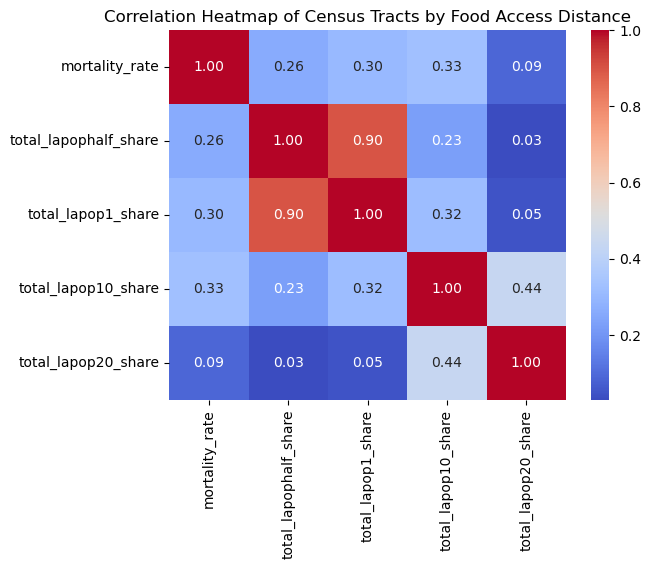

In [53]:
relevant_columns = ['mortality_rate', 'total_lapophalf_share',
                     'total_lapop1_share', 'total_lapop10_share', 'total_lapop20_share']
sns.heatmap(df_cleaned[relevant_columns].corr(), annot=True, cmap='coolwarm',fmt='.2f')
plt.title("Correlation Heatmap of Census Tracts by Food Access Distance")
plt.show()

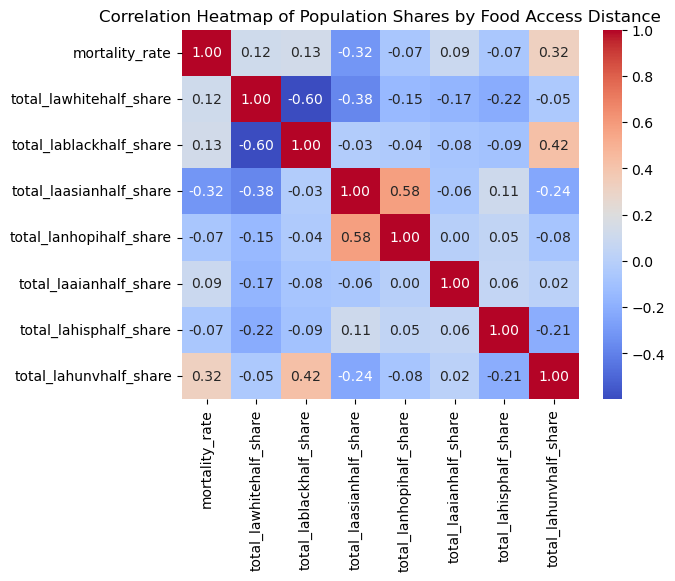

In [54]:
relevant_columns = ['mortality_rate', 'total_lawhitehalf_share', 'total_lablackhalf_share',
                    'total_laasianhalf_share', 'total_lanhopihalf_share', 'total_laaianhalf_share',
                    'total_lahisphalf_share', 'total_lahunvhalf_share']
sns.heatmap(df_cleaned[relevant_columns].corr(), annot=True, cmap='coolwarm',fmt='.2f')
plt.title("Correlation Heatmap of Population Shares by Food Access Distance")
plt.show()

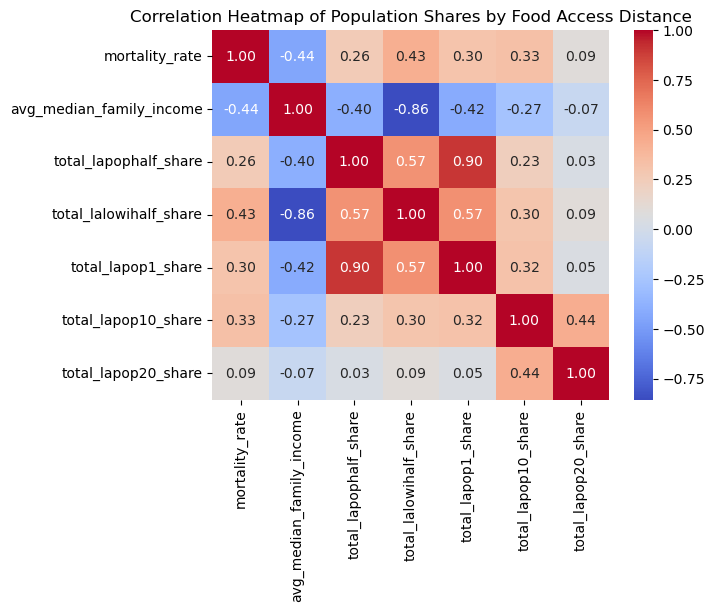

In [55]:
relevant_columns = ['mortality_rate', 'avg_median_family_income',
                     'total_lapophalf_share', 'total_lalowihalf_share', 'total_lapop1_share', 'total_lapop10_share', 'total_lapop20_share']
sns.heatmap(df_cleaned[relevant_columns].corr(), annot=True, cmap='coolwarm',fmt='.2f')
plt.title("Correlation Heatmap of Population Shares by Food Access Distance")
plt.show()

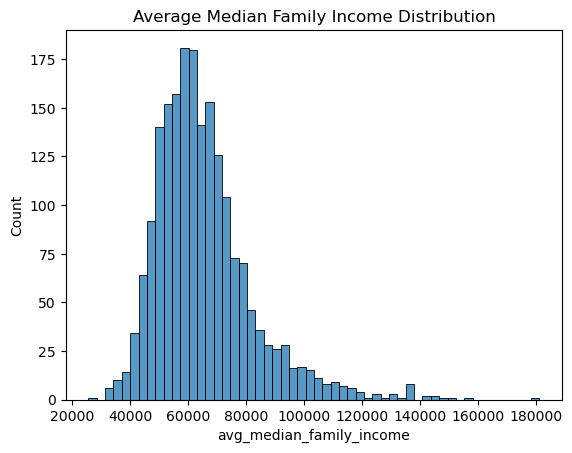

In [56]:
sns.histplot(df_cleaned['avg_median_family_income'])
plt.title('Average Median Family Income Distribution')
plt.show()

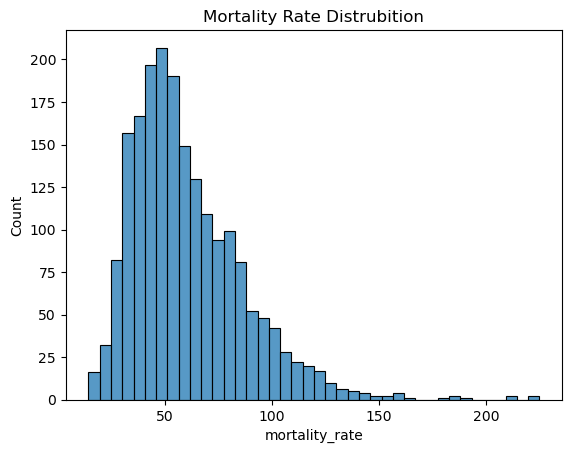

In [57]:
sns.histplot(df_cleaned['mortality_rate'])
plt.title('Mortality Rate Distrubition')
plt.show()

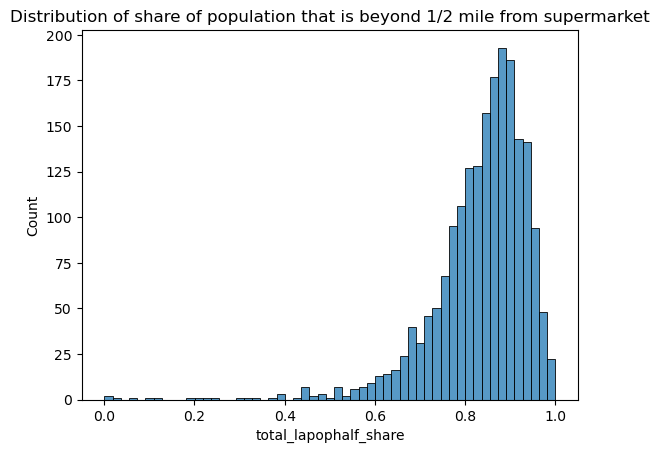

In [58]:
sns.histplot(df_cleaned['total_lapophalf_share'])
plt.title('Distribution of share of population that is beyond 1/2 mile from supermarket')
plt.show()

In [59]:
df_clean = df_cleaned.dropna(subset=['mortality_rate', 'total_lapophalf_share'])

# Compute Pearson correlation coefficient and p-value
corr, p_value = pearsonr(df_clean['mortality_rate'], df_clean['total_lapophalf_share'])

print(f"Pearson Correlation: {corr}")
print(f"P-value: {p_value}")

# Check significance
alpha = 0.05  # Common significance level (5%)
if p_value < alpha:
    print("The correlation is statistically significant.")
else:
    print("The correlation is NOT statistically significant.")


Pearson Correlation: 0.25859424530027764
P-value: 1.2454974446154066e-31
The correlation is statistically significant.


In [60]:
df_clean = df_cleaned.dropna(subset=['mortality_rate', 'avg_median_family_income'])

# Compute Pearson correlation coefficient and p-value
corr, p_value = pearsonr(df_clean['mortality_rate'], df_clean['avg_median_family_income'])

print(f"Pearson Correlation: {corr}")
print(f"P-value: {p_value}")

# Check significance
alpha = 0.05  # Common significance level (5%)
if p_value < alpha:
    print("The correlation is statistically significant.")
else:
    print("The correlation is NOT statistically significant.")

Pearson Correlation: -0.44355798110259437
P-value: 3.2113295857393177e-96
The correlation is statistically significant.


## Hypothesis Testing

### Attempt at t-test (check for normal distribution and equal variance)

KeyError: 'general_food_desert'

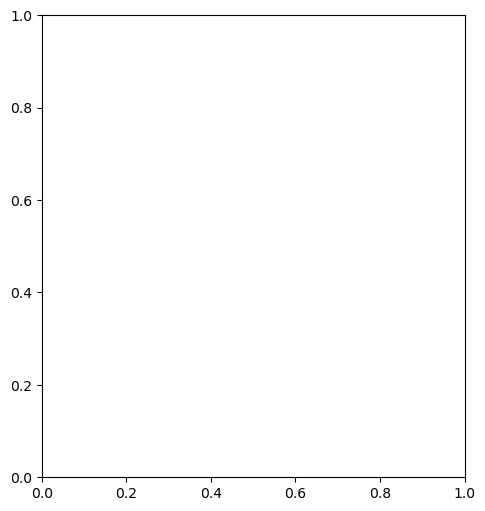

In [63]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(df_merged[df_merged['general_food_desert'] == 0]['mortality_rate'], bins=30, kde=True, color='red')
plt.title("Non-Food Desert Mortality Rates")
plt.xlabel("Mortality Rate")
plt.ylabel("Frequency")

plt.subplot(1, 2, 2)
sns.histplot(df_merged[df_merged['general_food_desert'] == 1]['mortality_rate'], bins=30, kde=True, color='blue')
plt.title("Food Desert Mortality Rates")
plt.xlabel("Mortality Rate")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

### QQ plots of non food deserts and food deserts 

In [ ]:

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
stats.probplot(df_merged[df_merged['general_food_desert'] == 0]['mortality_rate'], dist="norm", plot=plt)
plt.title("Q-Q Plot - Non-Food Desert Mortality Rates")

plt.subplot(1, 2, 2)
stats.probplot(df_merged[df_merged['general_food_desert'] == 1]['mortality_rate'], dist="norm", plot=plt)
plt.title("Q-Q Plot - Food Desert Mortality Rates")

plt.tight_layout()
plt.show()

### Kolmogorov-Smirnov (KS) test

In [ ]:
food_desert_group = df_merged[df_merged['food_desert'] == 1]['mortality_rate']
non_food_desert_group = df_merged[df_merged['food_desert'] == 0]['mortality_rate']

statistic, p_value = ks_2samp(food_desert_group, non_food_desert_group)

print(f"KS Test statistic: {statistic}, p-value: {p_value}")

In [ ]:
food_desert_group = df_merged[df_merged['general_food_desert'] == 1]['mortality_rate']
non_food_desert_group = df_merged[df_merged['general_food_desert'] == 0]['mortality_rate']

food_desert_sorted = np.sort(food_desert_group)
non_food_desert_sorted = np.sort(non_food_desert_group)

food_desert_cdf = np.arange(1, len(food_desert_sorted)+1) / len(food_desert_sorted)
non_food_desert_cdf = np.arange(1, len(non_food_desert_sorted)+1) / len(non_food_desert_sorted)

plt.figure(figsize=(8, 6))
plt.plot(food_desert_sorted, food_desert_cdf, label='Food Desert', color='blue')
plt.plot(non_food_desert_sorted, non_food_desert_cdf, label='Non-Food Desert', color='red')
plt.xlabel('Mortality Rate')
plt.ylabel('CDF')
plt.title('CDF of Mortality Rates in Food Deserts vs Non-Food Deserts')
plt.legend()
plt.grid(True)
plt.show()

### Permutation Test

In [ ]:
food_desert_group = df_merged[df_merged['general_food_desert'] == True]['mortality_rate']
non_food_desert_group = df_merged[df_merged['general_food_desert'] == False]['mortality_rate']

combined_mortality_rate = np.concatenate([food_desert_group.values, non_food_desert_group.values])
labels = np.concatenate([np.ones(len(food_desert_group)), np.zeros(len(non_food_desert_group))])
combined_df = pd.DataFrame({'mortality_rate': combined_mortality_rate, 'is_food_desert': labels})
combined_df.head()

In [ ]:
food_desert_group = combined_df[combined_df['is_food_desert'] == 1]['mortality_rate']
non_food_desert_group = combined_df[combined_df['is_food_desert'] == 0]['mortality_rate']

observed_diff = food_desert_group.mean() - non_food_desert_group.mean()
combined_data = np.concatenate([food_desert_group, non_food_desert_group])
n_permutations = 10000
permuted_diffs = []

for _ in range(n_permutations):
    permuted_data = np.random.permutation(combined_data) 
    perm_food_desert = permuted_data[:len(food_desert_group)]  
    perm_non_food_desert = permuted_data[len(food_desert_group):]
    perm_diff = perm_food_desert.mean() - perm_non_food_desert.mean()
    permuted_diffs.append(perm_diff)
permuted_diffs = np.array(permuted_diffs)
p_value = np.mean(np.abs(permuted_diffs) >= np.abs(observed_diff))

print(f"Observed difference in means: {observed_diff}")
print(f"Permutation test p-value: {p_value}")

In [ ]:
ks_statistic, ks_p_value = ks_2samp(food_desert_group, non_food_desert_group)

print(f"KS Test statistic: {ks_statistic}")
print(f"KS Test p-value: {ks_p_value}")

### Wald-Wolfowitz Runs Test

In [ ]:
food_desert_group = combined_df[combined_df['is_food_desert'] == 1]['mortality_rate']
non_food_desert_group = combined_df[combined_df['is_food_desert'] == 0]['mortality_rate']

combined_data = np.concatenate([food_desert_group.values, non_food_desert_group.values])
labels = np.concatenate([np.ones(len(food_desert_group)), np.zeros(len(non_food_desert_group))])

sorted_data_with_labels = list(zip(combined_data, labels))
sorted_data_with_labels.sort(key=lambda x: x[0])

runs = 1
for i in range(1, len(sorted_data_with_labels)):
    if sorted_data_with_labels[i][1] != sorted_data_with_labels[i-1][1]:
        runs += 1

n1 = len(food_desert_group)
n2 = len(non_food_desert_group)
expected_runs = (2 * n1 * n2) / (n1 + n2) + 1

variance_runs = (2 * n1 * n2 * (2 * n1 * n2 - n1 - n2)) / ((n1 + n2)**2 * (n1 + n2 - 1))

z = (runs - expected_runs) / np.sqrt(variance_runs)

p_value = 2 * (1 - stats.norm.cdf(np.abs(z)))

print(f"Observed number of runs: {runs}")
print(f"Expected number of runs: {expected_runs}")
print(f"Variance of runs: {variance_runs}")
print(f"Z-statistic: {z}")
print(f"P-value: {p_value}")

With a consistent p-value of 0, we reject our null hypothesis. The difference in mortality rates between food desert and non-food desert areas is statistically significant. 

## Regression Modeling

We want to take a deeper look into the key risk factors that contribute to the highest county-wide mortality rates in our data. To accomplish this, we can contruct a regression model with an optimal set of variables to predict the mortality rate. This model can potentially give us insight on what populations suffer the most from food deserts and how to focus public health efforts to reduce food insecurity among US counties.

In [72]:
import scipy.stats as stats
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf
from statsmodels.stats.outliers_influence import variance_inflation_factor

### Interested Variables

In [74]:
df_cleaned

,Deaths,avg_median_family_income,total_Urban,total_Pop2010,total_OHU2010,total_NUMGQTRS,total_PCTGQTRS,total_LILATracts_1And10,total_LILATracts_halfAnd10,total_LILATracts_1And20,...,total_TractWhite_share,total_TractBlack_share,total_TractAsian_share,total_TractNHOPI_share,total_TractAIAN_share,total_TractOMultir_share,total_TractHispanic_share,total_TractHUNV_share,total_TractSNAP_share,mortality_rate
County_State,,,,,,,,,,,,,,,,,,,,,
"Autauga County, AL",35,69337.500000,7,54571,20221,455.0,12.853691,5,5,3,...,0.785307,0.176706,0.008686,0.000586,0.004251,0.024464,0.024005,0.021825,0.049330,64.136629
"Baldwin County, AL",108,72665.741935,14,182265,73180,2307.0,41.062742,4,4,3,...,0.856736,0.093847,0.007396,0.000488,0.006672,0.034861,0.043848,0.014841,0.032513,59.254382
"Barbour County, AL",11,44792.444444,2,27457,9820,3193.0,79.735470,4,5,1,...,0.480023,0.468915,0.003897,0.001056,0.004152,0.041957,0.050515,0.030921,0.091634,40.062643
"Blount County, AL",18,60437.666667,1,57322,21578,489.0,7.248861,0,0,0,...,0.925788,0.013276,0.002041,0.000663,0.005356,0.052877,0.080702,0.014933,0.034297,31.401556
"Butler County, AL",24,50170.666667,2,20947,8491,333.0,11.934450,3,3,1,...,0.544183,0.434191,0.008450,0.000334,0.002864,0.009978,0.009118,0.024825,0.059579,114.574879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Laramie County, WY",51,77803.500000,17,91738,37576,1644.0,43.313942,4,4,4,...,0.885184,0.024505,0.010639,0.001548,0.009571,0.068554,0.130567,0.020068,0.029889,55.593102
"Natrona County, WY",39,77146.666667,12,75450,30616,1645.0,44.988999,1,2,1,...,0.927966,0.008814,0.006759,0.000517,0.010351,0.045593,0.069331,0.017389,0.029304,51.689861
"Park County, WY",11,75257.200000,4,28205,11885,942.0,15.673829,0,0,0,...,0.955540,0.001985,0.005885,0.000886,0.005956,0.029746,0.048396,0.015706,0.020989,39.000177


There are over 180 variables associated with each county in our cleaned, merged dataset, so we need to cut down and focus just on the variables we are most interested in. We identified the following 15 variables to include in our model, based on their description and correlation matrix defined above in the exploratory data analysis section. Intuitively, these variables can shed valuable insight on the nutritional and metabolic mortality rate in these US counties. Naturally, our dataset contains null values in many of the columns. We plan to use imputation to address these missing values, but the effects of imputation are typically only useful when the feature is missing less than around 10% of its values. As such, we focused our features to have less than 10% missing values to be able to apply imputation.

The variables are described as follows:

1. 'avg_median_family_income'
2. 'lapophalf_new'
3. 'lalowihalf_new'
4. 'lawhitehalf_new'
5. 'lablackhalf_new'
6. 'laasianhalf_new'
7. 'lanhopihalf_new'
8. 'laaianhalf_new',
9. 'lahisphalf_new'
10. 'lahunvhalf_new'
11. 'total_population'

The response variable 'mortality_rate' is a continuous quantitative data type, which is the crude mortality rate due to nutritional and metabolic diseases per 100,000 in a given US county.

In [76]:
interested_variables = [
    'avg_median_family_income', 'total_lapophalf_share', 
    'total_lalowihalf_share',
    'total_lawhitehalf_share', 'total_lablackhalf_share',
    'total_laasianhalf_share', 'total_laaianhalf_share',
    'total_lahisphalf_share', 
    'total_lahunvhalf_share', 'total_Pop2010', 'mortality_rate'
]

As shown, each of our 14 interested variables have missing counts that are less than 10% of the entire dataset.

In [78]:
for feature in interested_variables:
    missing_count=df_cleaned[feature].isna().sum()
    print(f'Missing values for feature {feature}:', missing_count, f'({np.round(missing_count/df_cleaned.shape[0], decimals=2)}% missing)')

Missing values for feature avg_median_family_income: 1 (0.0% missing)
Missing values for feature total_lapophalf_share: 0 (0.0% missing)
Missing values for feature total_lalowihalf_share: 0 (0.0% missing)
Missing values for feature total_lawhitehalf_share: 0 (0.0% missing)
Missing values for feature total_lablackhalf_share: 0 (0.0% missing)
Missing values for feature total_laasianhalf_share: 0 (0.0% missing)
Missing values for feature total_laaianhalf_share: 0 (0.0% missing)
Missing values for feature total_lahisphalf_share: 0 (0.0% missing)
Missing values for feature total_lahunvhalf_share: 0 (0.0% missing)
Missing values for feature total_Pop2010: 0 (0.0% missing)
Missing values for feature mortality_rate: 0 (0.0% missing)


In [79]:
# Drop 1 missing value and create df for regression
df_reg_var = df_cleaned.loc[:, interested_variables].dropna()
df_reg_var.head()

,avg_median_family_income,total_lapophalf_share,total_lalowihalf_share,total_lawhitehalf_share,total_lablackhalf_share,total_laasianhalf_share,total_laaianhalf_share,total_lahisphalf_share,total_lahunvhalf_share,total_Pop2010,mortality_rate
County_State,,,,,,,,,,,
"Autauga County, AL",69337.500000,0.907045,0.284362,0.709159,0.164699,0.006841,0.003958,0.021368,0.019133,54571,64.136629
"Baldwin County, AL",72665.741935,0.908675,0.263985,0.782021,0.082056,0.006344,0.006216,0.040153,0.011952,182265,59.254382
"Barbour County, AL",44792.444444,0.865444,0.433441,0.430836,0.388772,0.002695,0.003968,0.046319,0.027043,27457,40.062643
"Blount County, AL",60437.666667,0.958304,0.345547,0.889136,0.012482,0.001851,0.005162,0.074355,0.014337,57322,31.401556
"Butler County, AL",50170.666667,0.862436,0.412879,0.484572,0.358852,0.006969,0.002787,0.008545,0.025840,20947,114.574879


### Transforming Data 

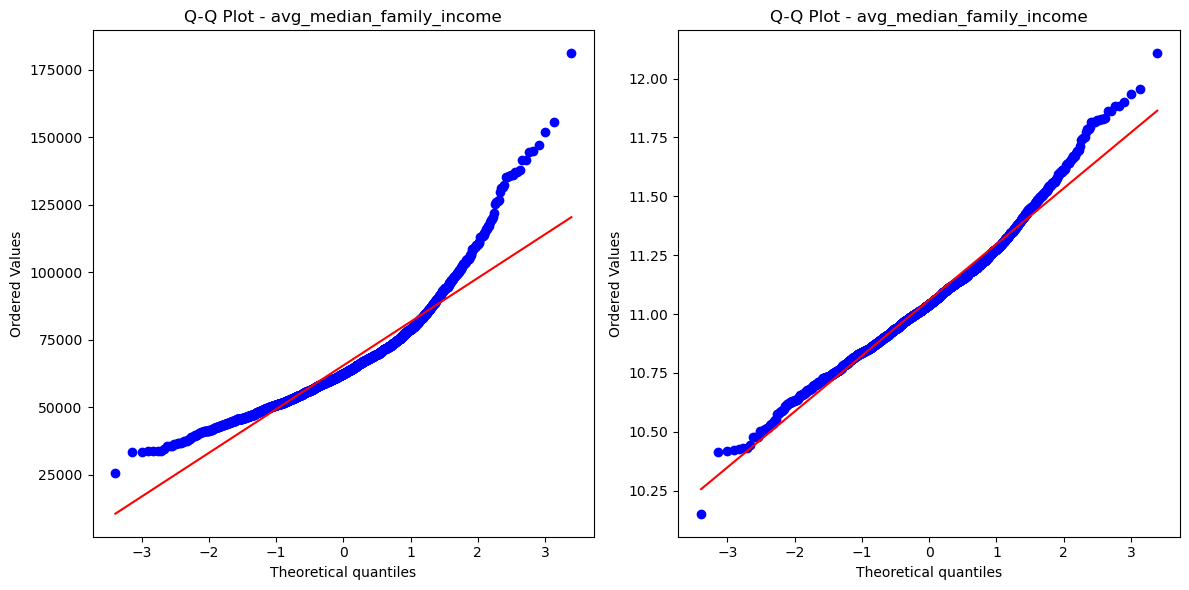

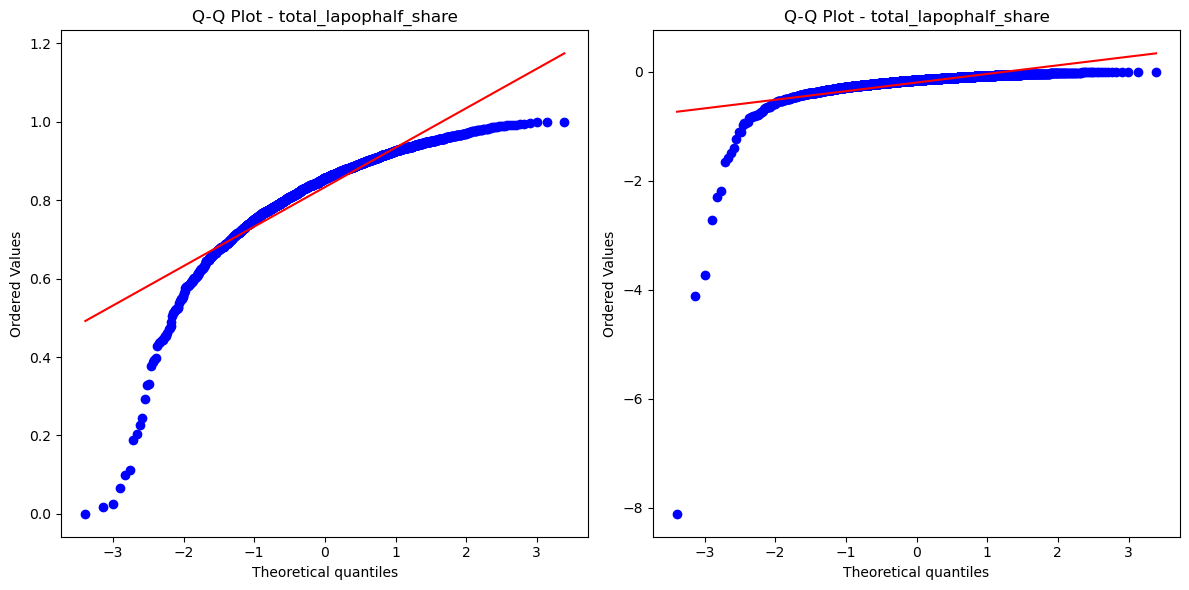

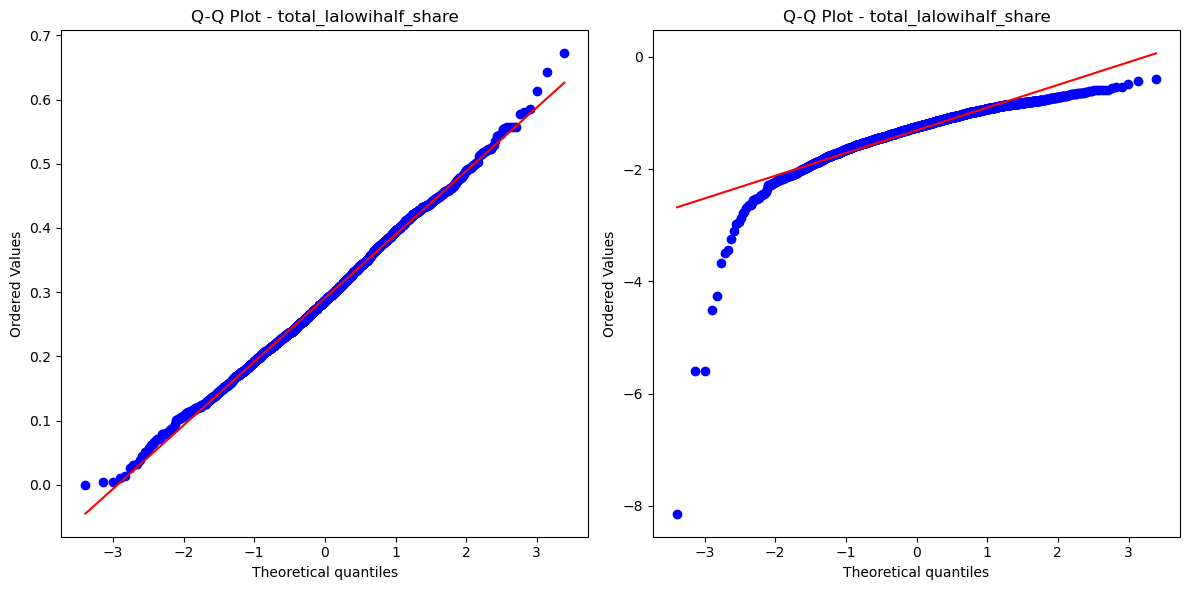

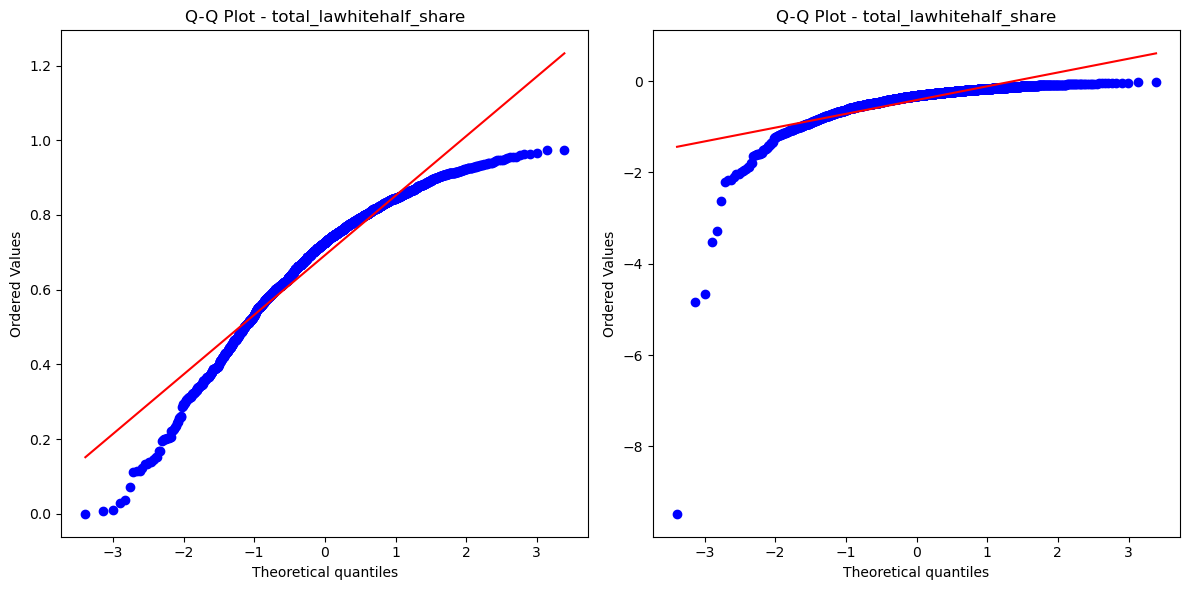

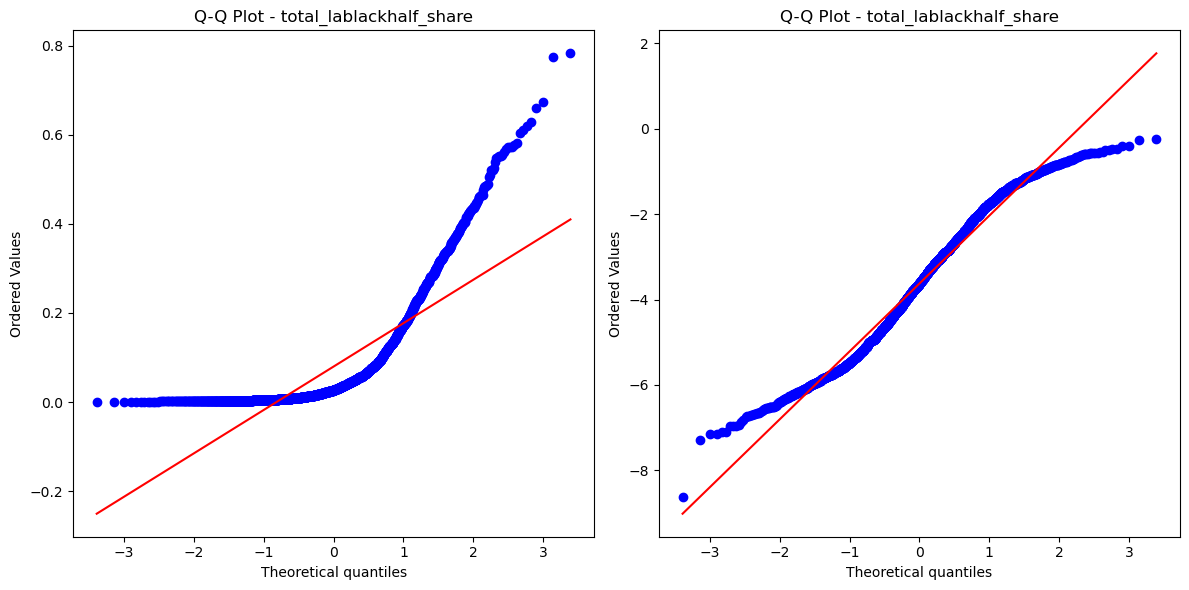

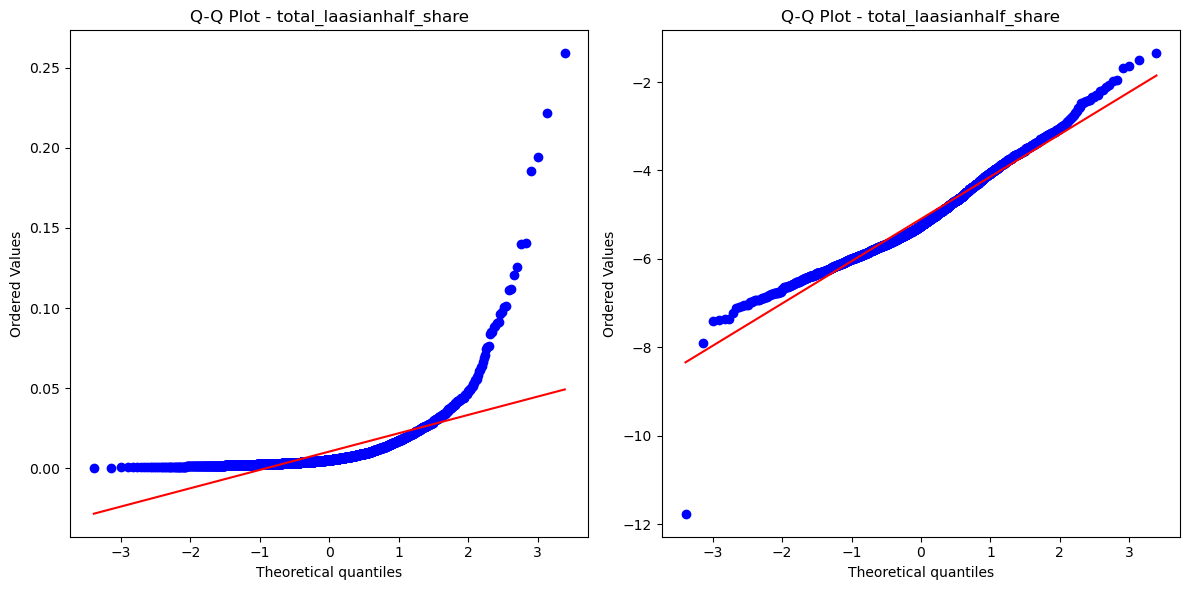

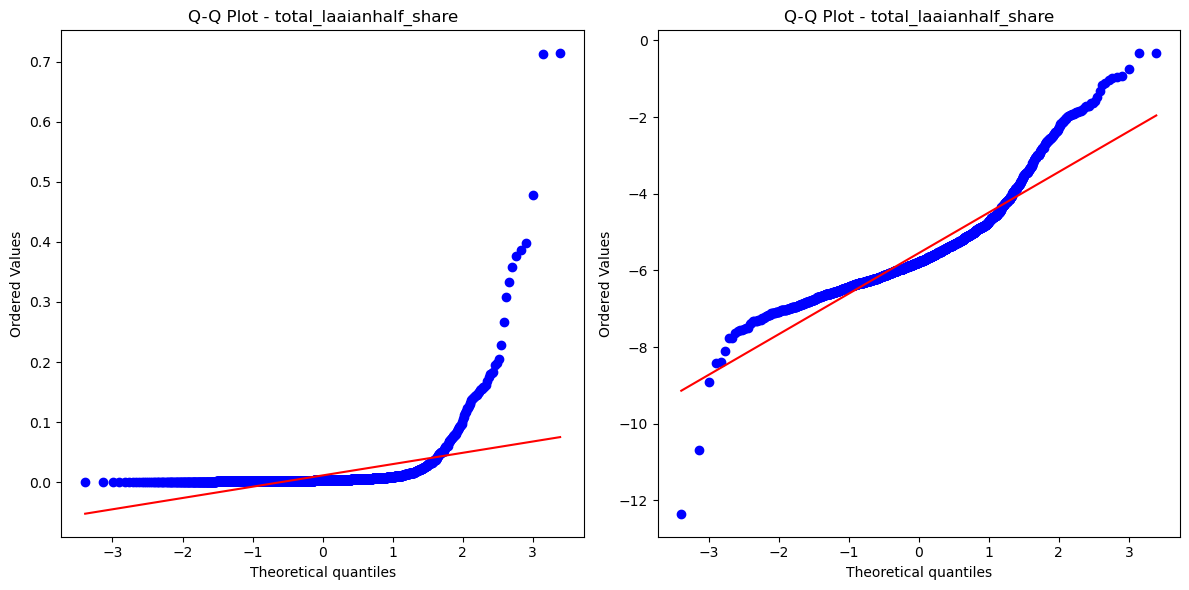

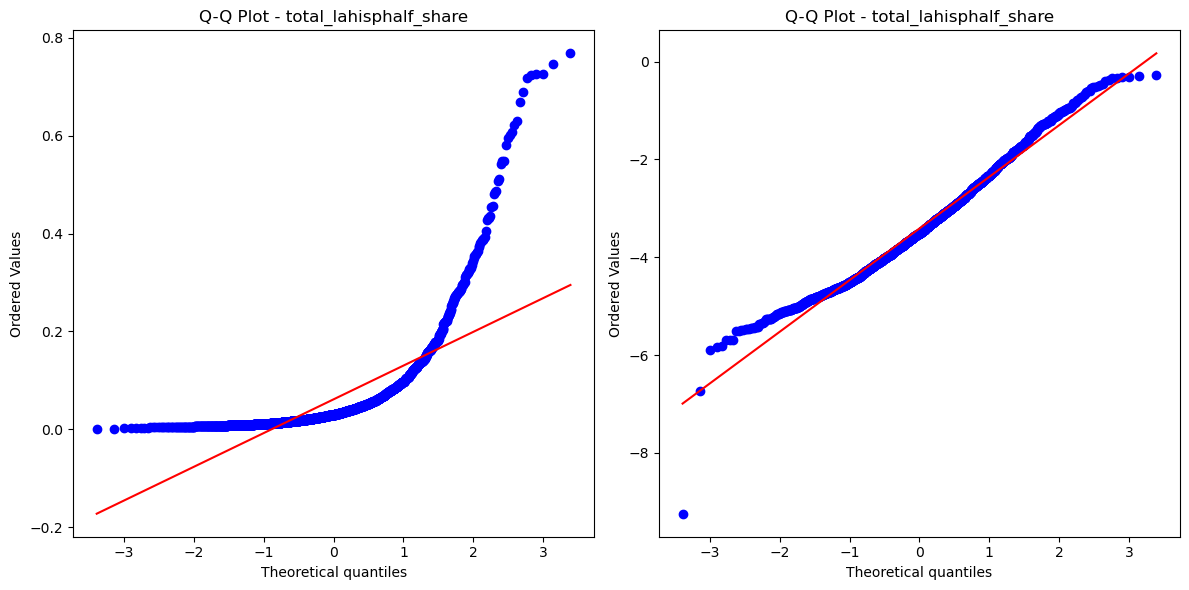

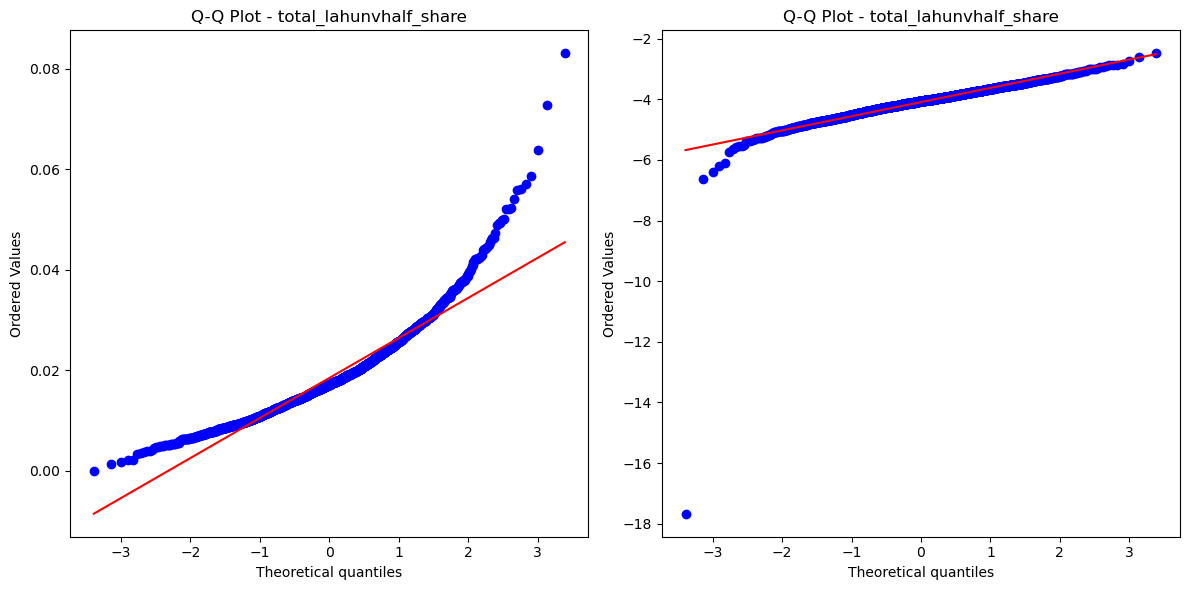

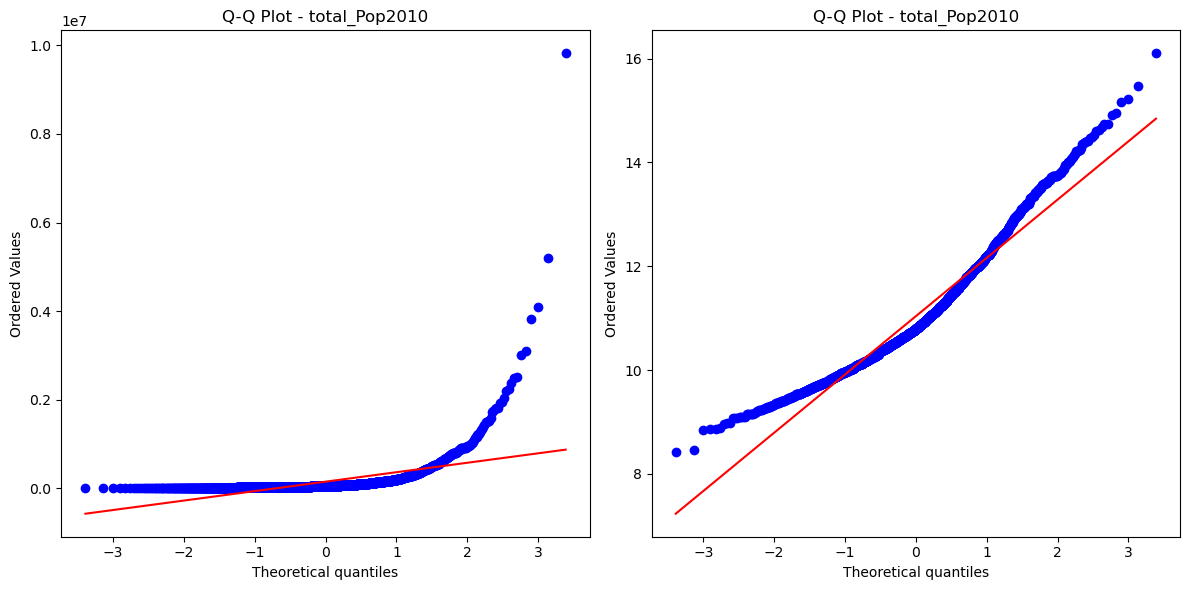

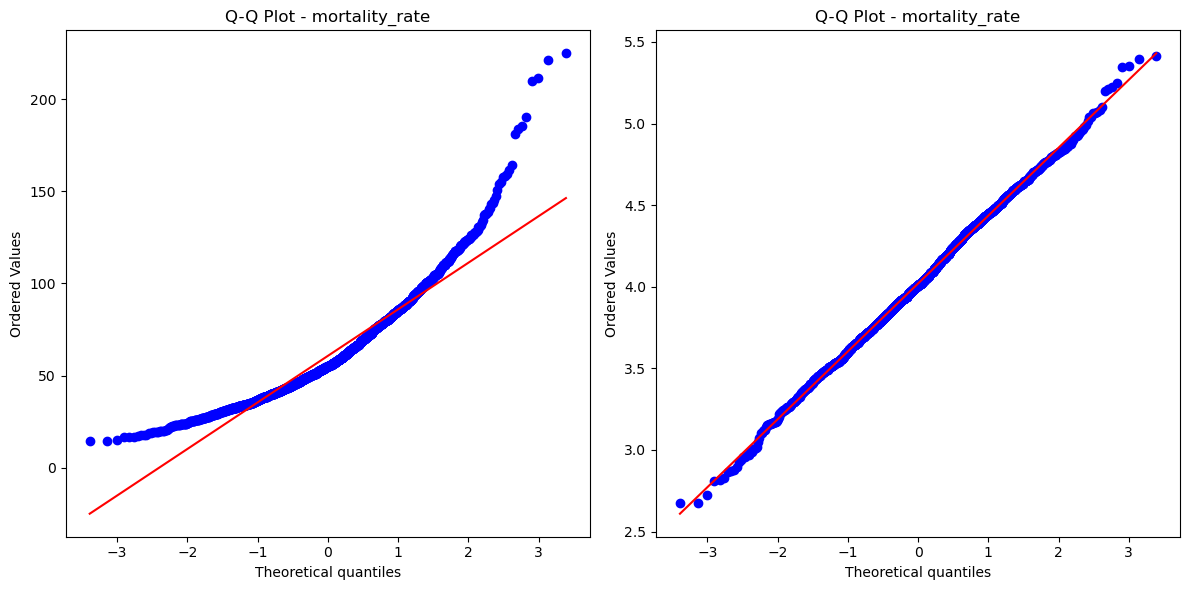

In [81]:
for var in interested_variables:
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    stats.probplot(df_reg_var[var], dist="norm", plot=plt)
    plt.title(f"Q-Q Plot - {var}")

    plt.subplot(1, 2, 2)
    stats.probplot(np.log(df_reg_var[var]), dist="norm", plot=plt)
    plt.title(f"Q-Q Plot - {var}")

    plt.tight_layout()
    plt.show()

In [82]:
# Apply a log to all of the intrested variables for a more normal dist
df_reg_trans = np.log(df_reg_var)

### Split Data

To test the performance of our model, we can set up a train/test/split process and divide our data into the training set (80%) and test set (20%). Ultimately, the model will be evaluated on data it has not seen before, providing a performance metric on its ability to generalize to new data.

In [85]:
# Split Data
X = df_reg_trans.drop(columns=['mortality_rate'])
X = X.copy()

y = df_reg_trans['mortality_rate']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Model

We can apply our transformations to our train and test sets. We then convert our transformed features back into a DataFrame to be able to use the StatsModels OLS regression model.

In [88]:
X_train

,avg_median_family_income,total_lapophalf_share,total_lalowihalf_share,total_lawhitehalf_share,total_lablackhalf_share,total_laasianhalf_share,total_laaianhalf_share,total_lahisphalf_share,total_lahunvhalf_share,total_Pop2010
County_State,,,,,,,,,,
"Cochise County, AZ",10.913262,-0.135642,-1.093224,-0.366136,-3.313148,-4.078287,-4.577589,-1.356906,-4.080353,11.785590
"Baker County, FL",11.155254,-0.048959,-1.129451,-0.216477,-2.118486,-5.325734,-5.984754,-3.997615,-5.195359,10.207842
"Emmet County, MI",11.141287,-0.210884,-1.474407,-0.280044,-5.636348,-5.523186,-3.613966,-4.650349,-4.331813,10.394947
"Montgomery County, KY",10.889805,-0.095838,-0.876033,-0.150708,-3.721679,-5.861763,-6.367153,-3.841072,-3.910185,10.184862
"Putnam County, GA",10.976693,-0.067319,-0.952400,-0.435627,-1.457906,-5.360521,-6.411212,-2.838124,-4.050634,9.962605
...,...,...,...,...,...,...,...,...,...,...
"Burke County, NC",10.893669,-0.094441,-0.982097,-0.250542,-2.839844,-3.401733,-5.824277,-3.356086,-4.110377,11.417647
"Summit County, OH",11.149320,-0.285937,-1.514602,-0.483657,-2.314872,-4.123303,-6.630442,-4.513887,-3.734654,13.202617
"Swift County, MN",11.102232,-0.370369,-1.661642,-0.398678,-5.914612,-6.888402,-6.616883,-3.687319,-4.507744,9.188401


Here, we create the formula with all of our features and run the OLS regression model on our transformed, training set. This represents the full model, which will likely not be the final, optimal model we will end up using to model our data. From the OLS regression results summary, we can observe that none of the coefficents of our variables, including the interept term, are statistically significant.

In [90]:
# Perform OLS regression with statsmodels formula API (use DataFrame for formula)
X_train['mortality_rate'] = y_train

# Fit the initial OLS model with all features
formula = 'mortality_rate ~ ' + ' + '.join(X_train.columns.drop('mortality_rate'))

In [91]:
# Fit the final model with the selected features
final_model = smf.ols(formula, X_train).fit()

# Check the summary of the model
print(final_model.summary())

                            OLS Regression Results                            
Dep. Variable:         mortality_rate   R-squared:                       0.379
Model:                            OLS   Adj. R-squared:                  0.375
Method:                 Least Squares   F-statistic:                     95.83
Date:                Sat, 15 Mar 2025   Prob (F-statistic):          1.05e-154
Time:                        12:07:09   Log-Likelihood:                -476.04
No. Observations:                1584   AIC:                             974.1
Df Residuals:                    1573   BIC:                             1033.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [92]:
def criterion(formula, df):
    """
    Calculate the BIC for a given regression model formula and given dataframe.

    Parameters:
    formula (str): The regression model formula.
    df (pandas.DataFrame): The dataframe containing the data.

    Returns:
    float: The BIC value of the fitted model.
    """
    model = smf.ols(formula, df).fit()
    criterion_value = model.bic
    return criterion_value

def remove(df, already_selected_columns, criterion, response='y'):
    """
    Identify the worst column to remove based on the given criterion.
    REMEMBER: The smaller the criterion, the better the model.

    Parameters:
    df (pandas.DataFrame): The dataframe containing the data.
    already_selected_columns (set): The set of currently selected columns.
    criterion (function): The criterion function to evaluate the model.
    response (str): The response variable name.

    Returns:
    tuple: The worst column to remove and its criterion value.
    """

    # initialize the worst criterion and column to None
    worst_criterion = float('inf')
    worst_column = None

    # iterate over the already selected columns to find the worst column to remove
    for column in already_selected_columns:
        new_columns = already_selected_columns - {column}
        formula = f'{response} ~ {" + ".join(new_columns)}'
        current_criterion = criterion(formula, df)
        if current_criterion < worst_criterion:
            worst_criterion = current_criterion
            worst_column = column
    return worst_column, worst_criterion

def backward(df, criterion, response='y'):
    """
    Perform backward selection to find the optimal model based on the given criterion.
    REMEMBER: The smallest criterion value is considered the best model fit.
    
    Parameters:
    df (pandas.DataFrame): The dataframe containing the data.
    criterion (function): The criterion function to evaluate the model.
    response (str): The response variable name.

    Returns:
    set: The set of selected columns in the optimal model.
    """

    # initialize the set of already selected columns to all columns except the response variable
    already_selected_columns = set(df.columns.drop(response))
    best_criterion = criterion(f'{response} ~ {' + '.join(already_selected_columns)}', df)
    while len(already_selected_columns) > 0:

        # identify the worst column to remove based on the given criterion
        potential_column, current_criterion = remove(df, already_selected_columns, criterion, response)

        # check if the model with the worst column removed has a better criterion value
        if current_criterion <= best_criterion:
            already_selected_columns.remove(potential_column)
            best_criterion = current_criterion
            print(f'Criterion: {best_criterion}')
        else:
            break
    final_selection = already_selected_columns
    return final_selection

In [93]:
backward_vars = backward(X_train, criterion, response='mortality_rate')
backward_vars

Criterion: 1025.9498611911283
Criterion: 1019.1317910285813
Criterion: 1013.7411974354857
Criterion: 1011.6342021043536
Criterion: 1006.0008457120346
Criterion: 1005.5930035342354


{'avg_median_family_income',
 'total_Pop2010',
 'total_laasianhalf_share',
 'total_lahunvhalf_share'}

In [94]:
# Fit the final model with the selected features
final_formula = 'mortality_rate ~ ' + ' + '.join(backward_vars)
final_model = smf.ols(final_formula, X_train).fit()

# Check the summary of the model
print(final_model.summary())

                            OLS Regression Results                            
Dep. Variable:         mortality_rate   R-squared:                       0.372
Model:                            OLS   Adj. R-squared:                  0.370
Method:                 Least Squares   F-statistic:                     233.8
Date:                Sat, 15 Mar 2025   Prob (F-statistic):          9.10e-158
Time:                        12:07:09   Log-Likelihood:                -484.38
No. Observations:                1584   AIC:                             978.8
Df Residuals:                    1579   BIC:                             1006.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

#### Interpretation of the coefficients

$e^\beta - 1$ 

### Evaluate Model

In [98]:
# Step 6: Make predictions on both training and test sets
train_predictions = final_model.predict(X_train)
test_predictions = final_model.predict(X_test)

# Step 7: Calculate RMSE for both training and test sets
train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))

print("Training RMSE:", train_rmse)
print("Test RMSE:", test_rmse)

Training RMSE: 0.32852418304741166
Test RMSE: 0.33647111176037986


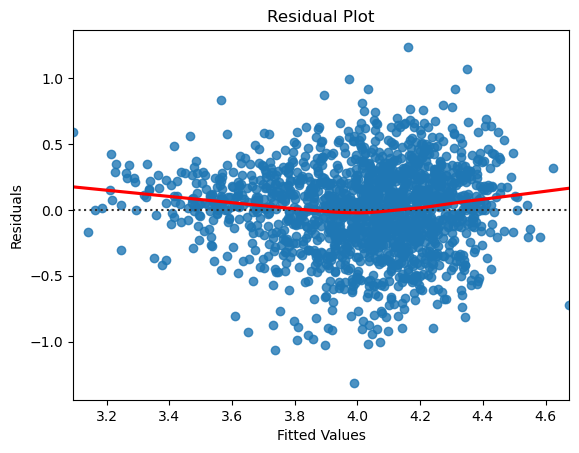

In [99]:
sns.residplot(x=final_model.fittedvalues, y=final_model.resid, lowess=True, line_kws={"color": "red"})

plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

Multicollinearity:

In [101]:
exog = final_model.model.exog
names = final_model.params.index
for i in range(1, exog.shape[1]):
    print(f'VIF: {names[i]}: {variance_inflation_factor(exog, i): .3f}')

VIF: total_lahunvhalf_share:  1.504
VIF: total_laasianhalf_share:  2.451
VIF: total_Pop2010:  2.108
VIF: avg_median_family_income:  2.176


The variance inflation factor (VIF) can be interpreted as follows: if there is correlation within the model, then the VIF will be very high because the $R^2$ will be very close to one. 

### Model Assumptions

#### Normality

Assumption satisfied

In [106]:
#import standardize function and apply to residuals
def standardize(X):
    return (X - X.mean()) / X.std()
standard_resid=standardize(final_model.resid)

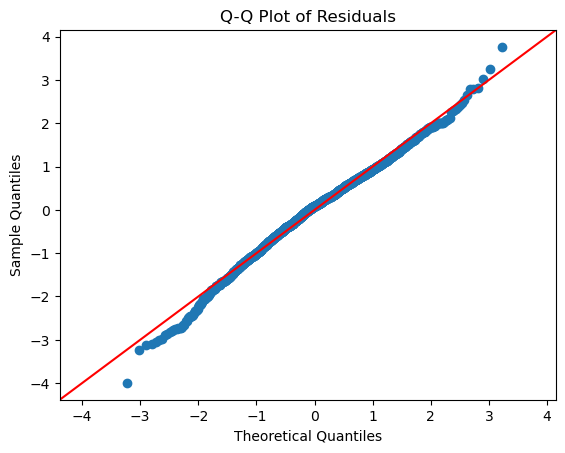

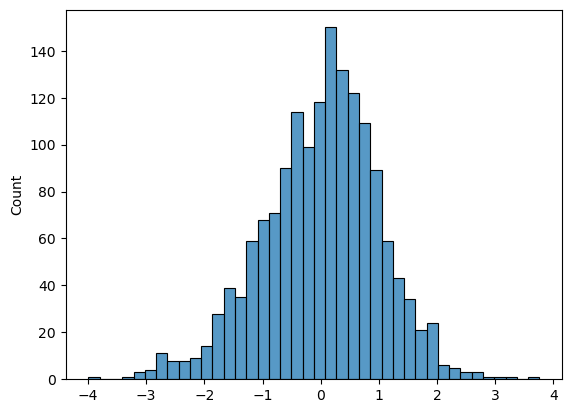

In [107]:
# Generate Q-Q plot
sm.qqplot(standard_resid, line='45', fit=True)
plt.title('Q-Q Plot of Residuals')
plt.show()

sns.histplot(standard_resid, bins=40)
plt.show()

#### Linearity and Identical

Assumption satisifed

Text(0.5, 1.0, 'Fitted values vs Standardized residuals')

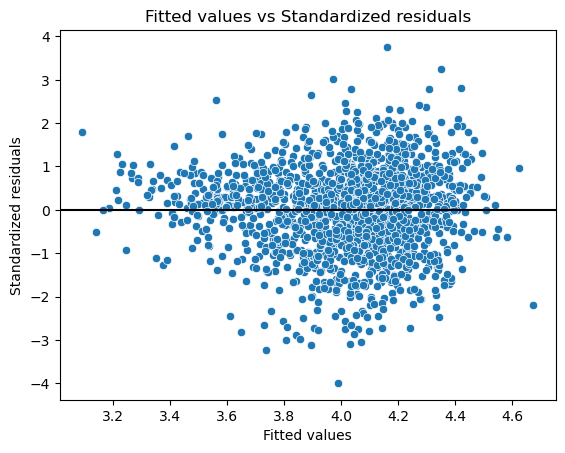

In [110]:
fig, ax = plt.subplots()
sns.scatterplot(x=final_model.fittedvalues, y=standard_resid, ax=ax).axhline(0, color="black")
ax.set_xlabel("Fitted values")
ax.set_ylabel("Standardized residuals")
plt.title("Fitted values vs Standardized residuals")

#### Independence

Assumption satisfied

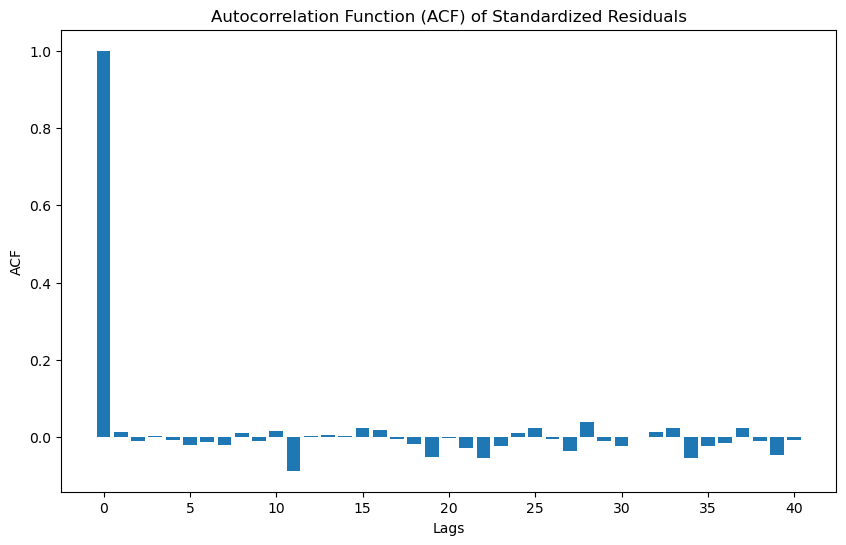

In [113]:
# Compute the ACF of the residuals
acf_values = acf(standard_resid, nlags=40)

# Plot the ACF of the residuals
plt.figure(figsize=(10, 6))
plt.bar(range(len(acf_values)), acf_values)
plt.title('Autocorrelation Function (ACF) of Standardized Residuals')
plt.xlabel('Lags')
plt.ylabel('ACF')
plt.show()

## Conclusion